**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>

**TCC - Avaliação de Projetos de Lei usando técnicas de NLP/ML**

#### Sprint 5 - v 1.5 
- iniciando com remoção das linhas com campo 'Texto' nulas, seguindo o resultado do Sprint 3
- pre-processamento com biblioteca nltk nas colunas 'Texto' e 'Ementa' da PLO seguido de neattext
- feature extraction com Wrod2Vec
- treinamento com LogisticRegression
- rodado em PC local (não AWS)

Ref: Natural Language Processing (NLP) 2023.1 - IFSP Campinas<br>
https://github.com/prof-samuka-IFSP/IFSP-CMP-D3TOP-2023.1/tree/main

Orientadora: Bianca Maria Pedrosa - IFSP Campinas<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### Etapa de limpeza e pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [2]:
import pandas as pd
import numpy as np

##### Leitura da base de dados

In [3]:
df = pd.read_csv('PLO_2019_v5.csv', sep=';')
df.head(3)

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...


In [4]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Vereador    0
Partido     0
Aprovado    0
Ementa      0
Texto       0
dtype: int64

In [5]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (370, 5)


In [6]:
df['Aprovado'].value_counts()

Aprovado
não    189
sim    181
Name: count, dtype: int64

### Processamento de texto: remoção de palavras irrelevantes e stemming
Remoção com bilioteca [nltk](https://www.nltk.org/)

In [7]:
!pip install --upgrade nltk

In [8]:
# Install the library and functions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Get a list of stopwords from the NLTK library
stop = stopwords.words('portuguese')
# New stopword list
# Add 'Art' and 'Lei' to the stopwords list (not relevant in this study)
sto = stop + ['art', 'lei']
# stopwords = [word for word in stop if word not in excluding]
stopwords = [word for word in sto]

In [10]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [11]:
snow = SnowballStemmer('portuguese')

In [12]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ''
        filtered_sentence=[]
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        for w in word_tokenize(sent):
            # Applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stopwords
            if(not w.isnumeric()) and (len(w)>2) and (w not in stopwords) :
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [13]:
print('Processand a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())
print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processand a coluna Texto
Processando a coluna Ementa


In [14]:
df.head(5)

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,decl órgã util públic municipal adra núcl prof...,fic declar órgã util públic municipal adra núc...
1,Ailton da Farmácia,PSD,sim,denomin prac zild mell smilgys prac públic mun...,fic denomin prac zild mell smilgys prac quart ...
2,Ailton da Farmácia,PSD,sim,denomin rua jos latar via públic municípi campin,fic denomin rua jos latar rua eament parqu res...
3,Ailton da Farmácia,PSD,sim,denomin prac robert angel castell áre públic m...,fic denomin prac robert angel castell pertence...
4,Ailton da Farmácia,PSD,não,dispõ sobr gratuidad duas hor estacion espac p...,institu gratuidad duas hor estacion espac públ...


### Processamento adicional de Texto usando Neattext
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [15]:
!pip install neattext

In [16]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    
    return text

In [17]:
# progress bar in pandas
!pip install tqdm

In [18]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [19]:
# pre-process the training set
df['Texto'] = df['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 370/370 [00:01<00:00, 364.04it/s]


In [20]:
# pre-process the training set
df['Ementa'] = df['Ementa'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 370/370 [00:00<00:00, 777.79it/s]


In [21]:
df.head(5)

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,decl rg util pblic municipal adra ncl prof css...,fic declar rg util pblic municipal adra ncl pr...
1,Ailton da Farmácia,PSD,sim,denomin prac zild mell smilgys prac pblic muni...,fic denomin prac zild mell smilgys prac quart ...
2,Ailton da Farmácia,PSD,sim,denomin rua jos latar pblic municpi campin,fic denomin rua jos latar rua eament parqu res...
3,Ailton da Farmácia,PSD,sim,denomin prac robert angel castell re pblic mun...,fic denomin prac robert angel castell pertence...
4,Ailton da Farmácia,PSD,não,disp sobr gratuidad duas hor estacion espac pb...,institu gratuidad duas hor estacion espac pbli...


#### Word Cloud for dataset

Text(0.5, 1.0, 'Word Cloud: Texto de PLOs')

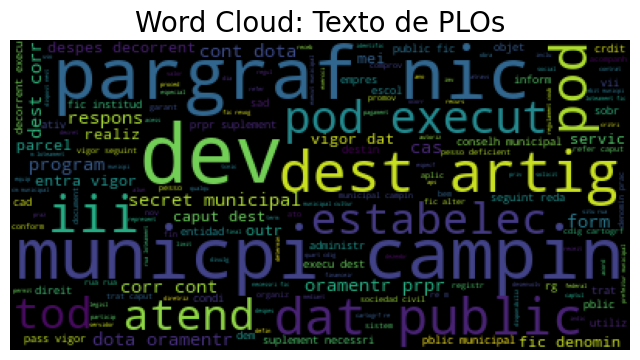

In [22]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['Texto'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud: Texto de PLOs', fontsize=20)

Text(0.5, 1.0, 'Word Cloud: Ementa de PLOs')

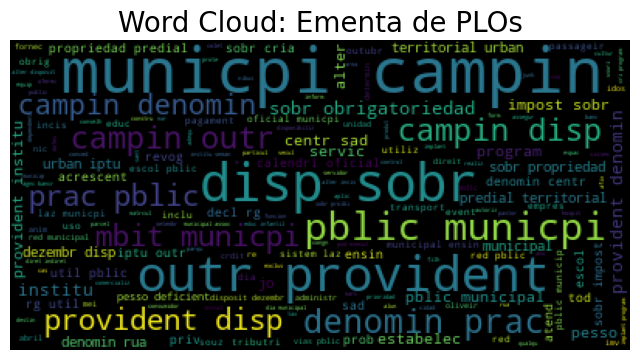

In [23]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['Ementa'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud: Ementa de PLOs', fontsize=20)

### Feature Extraction by gensim Word2Vec

In [24]:
!pip install gensim

In [25]:
import gensim.downloader as api

w2v_model = api.load('word2vec-google-news-300')
# erros de gateway timeout no AWS Sagemaker para baixar word2vec-google-news-300, mudar para glove-twitter-25
#w2v_model = api.load('glove-twitter-25')

In [26]:
#from gensim.models import KeyedVectors

#w2v_model = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

In [27]:
import numpy as np

def text_feat_extraction_by_word2vec(text: str, w2v_model) -> np.array:
    words = text.split()
    
    words_embedding_list = []
    for word in words:
        # check if the word belongs to the (pre-travocabulary
        if word in w2v_model:
            word_embedding = w2v_model[word]
            
            words_embedding_list.append(word_embedding)

    # do the same but in a pythonic way
    # words_embedding_list = [w2v_model[word] for word in words if word in w2v_model]

    if len(words_embedding_list) == 0:
        return np.zeros(300)

    words_embedding_np = np.array(words_embedding_list)
    
    # compute the average of each feature in the list of embeddings
    # return an averaged vector with 300 averages
    return words_embedding_np.mean(axis=0)

In [28]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Aprovado'], random_state=42)

In [29]:
print(f"===> TRAIN\n{df_train['Aprovado'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['Aprovado'].value_counts() / df_test.shape[0]}")

===> TRAIN
Aprovado
não    0.510135
sim    0.489865
Name: count, dtype: float64

===> TEST
Aprovado
não    0.513514
sim    0.486486
Name: count, dtype: float64


In [30]:
df_train

,Vereador,Partido,Aprovado,Ementa,Texto
236,Paulo Galterio,PSB,não,denomin centr sad zen thilfal centr sad municp...,fic denomin centr sad zen thilfal centr sad ba...
125,Jorge da Farmácia,PSDB,sim,inclu dia municipal sistem braill calendri ofi...,fic includ dia municipal sistem braill calendr...
320,Prefeito Municipal,Prefeito,sim,institu mus paz centr educ memr estud cultur a...,cm municipal aprov prefeit municpi campin sanc...
20,Carlão do PT,PT,sim,denomin bas operacional mar cristin von zuben ...,fic denomin bas operacional mar cristin von zu...
240,Paulo Galterio,PSB,não,determin cria banc digital atest mdic conced m...,fic determin cria banc digital atest mdic conc...
...,...,...,...,...,...
333,Rodrigo da Farmadic,PP,não,disp sobr obrigatoriedad instal pelcul trmic e...,conform manifest procurador legisl acat presi...
37,Carmo Luiz,PSC,sim,institu ms fevereir violet dedic realiz campan...,fic institud municpi campin ms fevereir violet...
229,Nelson Hossri,PTN,não,disp sobr cria bols eou espac pblic adequ esta...,conform manifest procurador legisl acat presi...
144,Jota Silva,PSB,sim,institu calendri oficial municpi campin ms mar...,fic institud calendri oficial municpi campin m...


In [31]:
# returns a series with the result
X_train = df_train['Texto'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))
X_test = df_test['Texto'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 632.86it/s]


In [32]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [33]:
# "gambiarra" to convert the Series of np.arrays into a 2D np.array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [34]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (296, 300)
X_test.shape = (74, 300)


In [35]:
# labels
y_train = df_train['Aprovado']
y_test = df_test['Aprovado']

In [36]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)

### Train the models (Train in local PC)

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [38]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [39]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         não       0.82      0.91      0.86       151
         sim       0.90      0.79      0.84       145

    accuracy                           0.85       296
   macro avg       0.86      0.85      0.85       296
weighted avg       0.86      0.85      0.85       296



In [40]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Train: {f1_train}')

F1 Train: 0.8503676470588235


In [41]:
from sklearn.metrics import balanced_accuracy_score
balacc_train = balanced_accuracy_score(y_train, y_train_pred)
print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.850057090659968


### Evaluate the model on the Test Set

In [42]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [43]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         não       0.84      0.82      0.83        38
         sim       0.81      0.83      0.82        36

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [44]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.8242922374429223


Word2Vec não melhorou resutados, se comparado com Sprint3.


In [45]:
from sklearn.metrics import balanced_accuracy_score
balacc_test = balanced_accuracy_score(y_test, y_test_pred)
print(f'Balanced Acc Test: {balacc_test}')

Balanced Acc Test: 0.8245614035087719


### Testing with 'Ementa'

In [46]:
# returns a series with the result
X_train = df_train['Ementa'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))
X_test = df_test['Ementa'].progress_apply(lambda text: text_feat_extraction_by_word2vec(text, w2v_model))

100%|████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 3085.09it/s]


In [47]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [48]:
# "gambiarra" to convert the Series of np.arrays into a 2D np.array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [49]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (296, 300)
X_test.shape = (74, 300)


In [50]:
# labels
y_train = df_train['Aprovado']
y_test = df_test['Aprovado']

In [51]:
#np.save('X_train.npy', X_train)
#np.save('X_test.npy', X_test)

### Train the models (Train in local PC)

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [53]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [54]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         não       0.80      0.92      0.86       151
         sim       0.90      0.76      0.82       145

    accuracy                           0.84       296
   macro avg       0.85      0.84      0.84       296
weighted avg       0.85      0.84      0.84       296



In [55]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Train: {f1_train}')

F1 Train: 0.8396773264188995


In [56]:
from sklearn.metrics import balanced_accuracy_score
balacc_train = balanced_accuracy_score(y_train, y_train_pred)
print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.8395752454898379


### Evaluate the model on the Test Set

In [57]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [58]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         não       0.86      0.84      0.85        38
         sim       0.84      0.86      0.85        36

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



In [59]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.851324200913242


Word2Vec não melhorou resutados, se comparado com Sprint3.

In [60]:
from sklearn.metrics import balanced_accuracy_score
balacc_test = balanced_accuracy_score(y_test, y_test_pred)
print(f'Balanced Acc Test: {balacc_test}')

Balanced Acc Test: 0.8516081871345029


Comparação dos resultados do sprint 5 com os resultados do sprint 3 considerando a coluna Texto:

Métrica	Sprint 5	Sprint 3 <br>
- Precisão	0,82	0,86 <br>
- Recall	0,91	0,94 <br>
- F1-score	0,86	0,90 <br>
- Acurácia	0,85	0,89 <br>

Comparação dos resultados do sprint 5 com os resultados do sprint 4 considerando a coluna Ementa:

Métrica	Sprint 5	Sprint 4 <br>
- Precisão	0,86	0,82 <br>
- Recall	0,84	0,81 <br>
- F1-score	0,85	0,82 <br>
- Acurácia	0,85	0,86 <br>

Conclusão:

As principais diferenças do sprint 5 são:

- Uso de Word2Vec: No sprint 5, o Word2Vec foi usado para extrair características do texto dos projetos de lei. No sprint 3, o TfidfVectorizer foi usado.
- Mudança na biblioteca de pré-processamento de dados: No sprint 5, a biblioteca nltk foi usada para pré-processar os dados de treinamento e teste. No sprint 3, a biblioteca Spacy foi usada.

Os resultados do sprint 5 são ligeiramente piores do que os resultados do sprint 3 considerando a coluna Texto. No entanto, os resultados do sprint 5 são ligeiramente melhores do que os resultados do sprint 4 considerando a coluna Ementa. Portanto, os resultados do sprint 5 são prioritários.

Os resultados do sprint 5 são melhores do que os resultados do sprint 4 considerando a coluna Ementa devido ao uso do Word2Vec para extrair características do texto dos projetos de lei. O Word2Vec é uma técnica de representação de palavras que pode capturar as relações semânticas entre as palavras. Isso pode ter ajudado o modelo a aprender a classificar projetos de lei com mais precisão.

No geral, parece que os resultados do sprint 5 são positivos.
